# Capstone - Vaccine Predictor

The Coronavirus has impacted millions of lives all over the world, like so many, it has taken up a lot of my mental space and energy over the last year. I wanted to channel this energy into something that would have a positive impact in stopping the spread of this disease. In order to achieve herd immunity for this virus, experts estimate it would require 80 -90% of the population to be immune. This is a very high percentage, requiring an abundant supply of vaccines and a large percentage of the population ready and willing to get these vaccines. This is why I built a vaccine predictor, it allows us to predict those less likely to get a vaccine so that we can run targeted educational campaigns and public health outreach. Thus, increasing the percentage of the population who will get the vaccine. 

The data used to build this model came from a survey done by the CDC. The CDC provided an R script that I used to obtain an .Rdata file. To get this file into Python I installed pyreadr into my environment.

In [1841]:
#Import required packages
import pyreadr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1842]:
#Read in .Rdata file 
result = pyreadr.read_r('NHFSPUF.Rdata')
df = result['NHFSPUF']

In [1843]:
#Preview of the dataframe
df

,INT_MONTH,LANGUAGE,SAMP_DESIG,SEQNUMHH,SEQNUMP,SUBGROUP,VACC1_H1N1_M,VACC1_H1N1_T,VACC1_H1N1_Y,VACC1_SEAS_M,...,RACEETH4_I,RACE_I_R,RENT_OWN_R,SEX_I,CEN_REG,FLUWT,HHS_REGION,MSA3_I,MSA_DEF,STATE
0,OCT09,1,FR,38548,385481,A,NaN,NaN,NaN,NaN,...,3,1,2,2,4,213.304270,6,1,NOV 2008,35
1,OCT09,1,FR,18823,188231,A,NaN,NaN,NaN,10,...,4,3,2,2,2,5160.215000,5,2,NOV 2008,39
2,OCT09,1,FR,18823,188232,C,NaN,NaN,NaN,10,...,1,3,2,2,2,20235.802976,5,2,NOV 2008,39
3,NOV09,1,FR,54046,540461,A,NaN,NaN,NaN,10,...,3,1,1,2,4,804.891317,10,3,NOV 2008,16
4,OCT09,1,FR,21986,219861,A,NaN,NaN,NaN,NaN,...,3,1,1,2,4,2849.547713,10,1,NOV 2008,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70939,APR10,1,FC,20632,206321,A,NaN,NaN,NaN,10,...,3,1,1,1,3,4777.635145,3,1,NOV 2008,24
70940,APR10,1,FC,20632,206322,C,NaN,NaN,NaN,NaN,...,3,1,1,2,3,32750.356260,3,1,NOV 2008,24
70941,MAY10,1,FC,42234,422341,A,NaN,1,NaN,NaN,...,1,1,1,1,4,1926.464976,6,2,NOV 2008,35
70942,MAY10,1,FC,42234,422342,C,NaN,1,NaN,11,...,1,1,1,2,4,3028.330643,6,2,NOV 2008,35


In [1844]:
#Print columns in df
for col in df.columns:
    print(col)

INT_MONTH
LANGUAGE
SAMP_DESIG
SEQNUMHH
SEQNUMP
SUBGROUP
VACC1_H1N1_M
VACC1_H1N1_T
VACC1_H1N1_Y
VACC1_SEAS_M
VACC1_SEAS_T
VACC1_SEAS_Y
VACC2_H1N1_M
VACC2_H1N1_T
VACC2_H1N1_Y
VACC2_SEAS_M
VACC2_SEAS_T
VACC2_SEAS_Y
VACC_H1N1_COUNT
VACC_H1N1_F
VACC_PNEU_COUNT
VACC_PNEU_F
VACC_SEAS_COUNT
VACC_SEAS_F
B_H1N1_ANTIV
B_H1N1_AVOID
B_H1N1_FMASK
B_H1N1_HANDS
B_H1N1_LARGE
B_H1N1_RCONT
B_H1N1_TOUCH
CONCERN_DKNW_F
CONCERN_NONE_F
CONCERN_NOTV_F
CONCERN_REFD_F
CONCERN_SOME_F
CONCERN_VERY_F
HQ23
HQ24
HQ24_B
INT_H1N1_DKNW_F
INT_H1N1_DNOT_F
INT_H1N1_DYES_F
INT_H1N1_PNOT_F
INT_H1N1_PYES_F
INT_H1N1_REFD_F
INT_NEXT_DKNW_F
INT_NEXT_DNOT_F
INT_NEXT_DYES_F
INT_NEXT_PNOT_F
INT_NEXT_PYES_F
INT_NEXT_REFD_F
INT_SEAS_DKNW_F
INT_SEAS_DNOT_F
INT_SEAS_DYES_F
INT_SEAS_PNOT_F
INT_SEAS_PYES_F
INT_SEAS_REFD_F
KNOW_H1N1_ALOT_F
KNOW_H1N1_DKNW_F
KNOW_H1N1_LITL_F
KNOW_H1N1_NONE_F
KNOW_H1N1_REFD_F
PLACE_H1N1_CLIN_F
PLACE_H1N1_DEPT_F
PLACE_H1N1_DKNW_F
PLACE_H1N1_DOCT_F
PLACE_H1N1_HOSP_F
PLACE_H1N1_MTRY_F
PLACE_H1N1_OTHM_F
PLACE_H

This dataframe contains over 170 columns which correspond to features that describe the interview (language, timing etc.) as well as questions that were asked to the respondent. Not all of these columns are relevant to my end goal so I went through each one and did research to determine which ones to keep. Some questions were very similar so I picked only the most informative to keep. The CDC attached a codebook describing each column and what the values in it represent so I used this to aid in this process.

In [1845]:
#Check shape of df
df.shape

(70944, 171)

The large number of rows tells us that we have enough data to be able to clean up null values and still be left with enough information to pull insights from.

In [1846]:
#Choose to import only select columns, to maximize efficiency and eliminate redundancy
df2 = df[['VACC_H1N1_F','VACC_SEAS_F','B_H1N1_LARGE', 'B_H1N1_FMASK','B_H1N1_RCONT','Q23','Q24', 'Q24_B','HQ23','HQ24','HQ24_B','AGEGRP','EDUCATION_COMP','INC_CAT1','INSURE','MARITAL','RENT_OWN_R','Q95','Q95_INDSTR','RACEETH4_I','SEX_I','MSA3_I','STATE']]

## Cleaning

In [2002]:
#Rename columns so they communicate the contents of the column
df2 = df2.rename(columns = {'VACC_H1N1_F':'h1n1_vaccine',
                            'VACC_SEAS_F':'seasonal_vaccine',
                            'B_H1N1_LARGE':'behavioral_large_groups',
                            'B_H1N1_FMASK':'behavioral_f_mask',
                            'B_H1N1_RCONT':'behavioral_out_home',
                            'Q23':'opinion_flu_effective', 
                            'Q24':'opinion_flu_risk', 
                            'Q24_B':'opinion_sick_from_f_vacc',
                            'HQ24':'opinion_h1n1_risk', 
                            'HQ23':'opinion_h1n1_effective', 
                            'HQ24_B':'opinion_sick_from_h1n1_vacc', 
                            'AGEGRP':'age_group',
                            'EDUCATION_COMP':'education_level',
                            'INC_CAT1':'household_income',
                            'INSURE': 'health_insurance',
                            'MARITAL':'marital_status',
                            'RENT_OWN_R':'rent_or_own',
                            'Q95':'work_status',
                            'Q95_INDSTR': 'employment_industry',
                            'RACEETH4_I': 'race', 
                            'SEX_I': 'sex',
                            'MSA3_I': 'msa_status',
                            'STATE':'state'})

### Data Dictionary

The answers for each question in the survey are in numeric form, the corresponding answer can be found in the codebook that was included with the survey. I will include this in the data dictionary below. As most of the data is ordinal, it makes sense to leave this in numeric form.

**Target variables:**
 - h1n1_vaccine:
     - 0 - did not receive vaccine
     - 1 - received vaccine
 - seasonal_vaccine:
     - 0 - did not receive vaccine
     - 1 - received vaccine

**Behavioral Indicators:**
 - behavioral_large_groups: Have you reduced your time at large gatherings?
     - 0 - no
     - 1 - yes
 - behavioral_f_mask: Have you bought a face mask?
     - 0 -no
     - 1 -yes
 - behavioral_out_home: Have you reduced your contact with people outside your home?
     - 0 -no
     - 1 -yes
     
**Opinions:**
 - opinion_flu_effective: In your opinion, what is the effectiveness of the seasonal flu vaccine?
     - 1 - Very effective
     - 2 - Somewhat effective
     - 3 - Not very effective
     - 4 - Not at all effective
     - 77 - Don't know
     - 99 - Refused

Both 77 and 99 will be imputed with the mode, as these categories do not provide information

 - opinion_flu_risk: In your opinion, what is the risk of getting sick with the flu without the seasonal flu vaccine?
     - 1 - Very high
     - 2 - Somewhat high
     - 3 - Somewhat low
     - 4 - Very low
     - 77 - Don't know
     - 99 - Refused

Both 77 and 99 will be imputed with the mode, as these categories do not provide information
 
 - opinion_sick_from_f_vacc : Are you worried about getting sick from the flu vaccine?
     - 1 - Very worried
     - 2 - Somewhat worried
     - 3 - Not very worried
     - 4 - Not at all worried
     - 77 - Don't know
     - 99 - Missing 

Both 77 and 99 will be imputed with the mode, as these categories do not provide information

- opinion_h1n1_effective: In your opinion, what is the effectiveness of the H1N1 vaccine?
     - 1 - Very effective
     - 2 - Somewhat effective
     - 3 - Not very effective
     - 4 - Not at all effective
     - 77 - Don't know
     - 99 - Refused

Both 77 and 99 will be imputed with the mode, as these categories do not provide information
 
- opinion_h1n1_risk: In your opinion, what is the risk of getting sick with H1N1 without the H1N1 vaccine?
     - 1 - Very high
     - 2 - Somewhat high
     - 3 - Somewhat low
     - 4 - Very low
     - 77 - Don't know
     - 99 - Refused

Both 77 and 99 will be imputed with the mode, as these categories do not provide information

- opinion_sick_from_h1n1_vacc : Are you worried about getting sick from the H1N1 vaccine?
     - 1 - Very worried
     - 2 - Somewhat worried
     - 3 - Not very worried
     - 4 - Not at all worried
     - 77 - Don't know
     - 99 - Missing 

Both 77 and 99 will be imputed with the mode, as these categories do not provide information

**Demographic Data:**
- age_group: 
    - 1 - 18-34 Years
    - 2 -35-44 Years
    - 3 -45-54 Years
    - 4 -55-64 Years
    - 5 -65+ Years

- educational_level
    - 1 - <12 Years
    - 2 - 12 Years
    - 3 - Some College
    - 4 - College Graduate
    
- household_income
    - 1 - <= 10,000
    - 2 - 10,001 - 15,000
    - 3 - 15,001 - 25,000
    - 4 - 25,001 - 35,000
    - 5 - 35,001 - 50,000
    - 6 - 75,001 - 100,000
    
- marital_status
    - 1 - Not Married
    - 2 - Married
    
- rent_or_own
    - 1 - own
    - 2 - rent
    
- work_status
    - 1 - Employed
    - 2 - Unemployed
    - 3 - Not in Labor Force
    - 77 - Don't Know
    - 99 - Refused

Both 77 and 99 will be imputed with the mode, as these categories do not provide information

- race
    - 1 - Hispanic
    - 2 - African American
    - 3 - Caucasian
    - 4 - Other or Multiple Races
- sex 
    - 1 - Female
    - 2 - Male
    
- msa_status

    - 1 - principle city
    - 2 - not principle city
    - 3 - non-msa
    
- State 
     - States go in alphabetical order corresponding to 1 - 51

In [2004]:
#Look at the type of each variable
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55615 entries, 0 to 70943
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   h1n1_vaccine                 55615 non-null  int64
 1   seasonal_vaccine             55615 non-null  int64
 2   behavioral_large_groups      55615 non-null  int64
 3   behavioral_f_mask            55615 non-null  int64
 4   behavioral_out_home          55615 non-null  int64
 5   opinion_flu_effective        55615 non-null  int64
 6   opinion_flu_risk             55615 non-null  int64
 7   opinion_sick_from_f_vacc     55615 non-null  int64
 8   opinion_h1n1_effective       55615 non-null  int64
 9   opinion_h1n1_risk            55615 non-null  int64
 10  opinion_sick_from_h1n1_vacc  55615 non-null  int64
 11  age_group                    55615 non-null  int32
 12  education_level              55615 non-null  int64
 13  household_income             55615 non-null  i

In [2006]:
#Convert the target variables to integers
df2['h1n1_vaccine'] = df2['h1n1_vaccine'].astype(int)
df2['seasonal_vaccine'] = df2['seasonal_vaccine'].astype(int)

In [1850]:
#Determine the class balance
(df2['h1n1_vaccine'] == 1).sum()/df2['h1n1_vaccine'].count()

0.2419761837255458

The herd immunity rate required to stop the transmission of the H1N1 influenza was 30-40%, so it makes sense that we have a low percentage of respondents receiving the vaccine. This class imbalance will make it more difficult for the model to learn the factors describing a person that received the vaccine. This class imbalance will require upsampling, enabling the model to achieve a higher precision and recall. We want to avoid a lazy model that will attempt to achieve a high accuracy score just by choosing 0 (no vaccine) everytime.

In [1851]:
#Check null values
df2['h1n1_vaccine'].isna().sum()

404

In [1852]:
#Check percentage of null values to see what should be done
(df2['h1n1_vaccine'].isna().sum()/df2['h1n1_vaccine'].count())*100

0.5727246952083924

As this is a very small percentage of null values, these will be dropped 

In [1853]:
#Drop all rows that are Nan
df2 = df2.dropna(subset = ['h1n1_vaccine'], axis = 0)
df2

,h1n1_vaccine,seasonal_vaccine,behavioral_large_groups,behavioral_f_mask,behavioral_out_home,opinion_flu_effective,opinion_flu_risk,opinion_sick_from_f_vacc,opinion_h1n1_effective,opinion_h1n1_risk,...,household_income,health_insurance,marital_status,rent_or_own,work_status,employment_industry,race,sex,msa_status,state
0,0,0,1,0,1,2,4,3,2,4,...,1,NaN,2,2,3,NaN,3,2,1,35
1,0,1,1,0,0,2,3,3,77,77,...,3,NaN,2,2,2,NaN,4,2,2,39
2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,2,NaN,NaN,1,2,2,39
3,0,1,1,1,1,1,2,4,2,2,...,3,NaN,1,1,1,16,3,2,3,16
4,0,0,1,0,1,1,2,4,1,3,...,3,NaN,2,1,1,16,3,2,1,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70939,0,1,0,0,0,1,3,4,77,3,...,7,1,2,1,1,98,3,1,1,24
70940,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,1,NaN,1,NaN,NaN,3,2,1,24
70941,1,1,0,0,1,2,3,3,77,77,...,NaN,1,1,1,1,20,1,1,2,35
70942,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,NaN,1,2,2,35


In [1854]:
#Check null values
df2['seasonal_vaccine'].isna().sum()

282

In [1855]:
#Check null values percentage
((df2['seasonal_vaccine'].isna().sum())/df2['seasonal_vaccine'].count())*100

0.401377779042956

In [1856]:
#Drop these rows that are null values 
#Since this is the target variable, this should not be imputed
df2 = df2.dropna(subset = ['seasonal_vaccine'], axis = 0)
df2

,h1n1_vaccine,seasonal_vaccine,behavioral_large_groups,behavioral_f_mask,behavioral_out_home,opinion_flu_effective,opinion_flu_risk,opinion_sick_from_f_vacc,opinion_h1n1_effective,opinion_h1n1_risk,...,household_income,health_insurance,marital_status,rent_or_own,work_status,employment_industry,race,sex,msa_status,state
0,0,0,1,0,1,2,4,3,2,4,...,1,NaN,2,2,3,NaN,3,2,1,35
1,0,1,1,0,0,2,3,3,77,77,...,3,NaN,2,2,2,NaN,4,2,2,39
2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,2,NaN,NaN,1,2,2,39
3,0,1,1,1,1,1,2,4,2,2,...,3,NaN,1,1,1,16,3,2,3,16
4,0,0,1,0,1,1,2,4,1,3,...,3,NaN,2,1,1,16,3,2,1,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70939,0,1,0,0,0,1,3,4,77,3,...,7,1,2,1,1,98,3,1,1,24
70940,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,1,NaN,1,NaN,NaN,3,2,1,24
70941,1,1,0,0,1,2,3,3,77,77,...,NaN,1,1,1,1,20,1,1,2,35
70942,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,NaN,1,2,2,35


In [1857]:
#Check the amount of null values in the df
df2.isna().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
behavioral_large_groups        14197
behavioral_f_mask              14070
behavioral_out_home            14203
opinion_flu_effective          14891
opinion_flu_risk               14994
opinion_sick_from_f_vacc       15100
opinion_h1n1_effective         14643
opinion_h1n1_risk              14728
opinion_sick_from_h1n1_vacc    14802
age_group                          0
education_level                16977
household_income               14941
health_insurance               31998
marital_status                 17022
rent_or_own                     3636
work_status                    16725
employment_industry            41660
race                               0
sex                                0
msa_status                         0
state                              0
dtype: int64

We can see that there are a similar amount of null values between behavioral_large_groups, behavioral_f_mask, behavioral_out_home, opinion_flu_effective, opionion_flu_risk, opinion_sick_from_f_vaccine, opinion_h1n1_effective, opinion_h1n1_risk, opinion_sick_from_h1n1_vaccine, and education_level. It would be beneficial to see if these null values are all in the same row, if so, we will drop these values as the row does not provide much information.

In [1858]:
#Check to see if there are a high percentage of null values between these rows
df2[df2['behavioral_f_mask'].isna() & df2['behavioral_large_groups'].isna() & df2['behavioral_out_home'].isna() & df2['opinion_flu_effective'].isna() & df2['opinion_flu_risk'].isna() & df2['opinion_sick_from_f_vacc'].isna() & df2['opinion_h1n1_effective'].isna() & df2['opinion_h1n1_risk'].isna() & df2['opinion_sick_from_h1n1_vacc'].isna() & df2['education_level'].isna()]

,h1n1_vaccine,seasonal_vaccine,behavioral_large_groups,behavioral_f_mask,behavioral_out_home,opinion_flu_effective,opinion_flu_risk,opinion_sick_from_f_vacc,opinion_h1n1_effective,opinion_h1n1_risk,...,household_income,health_insurance,marital_status,rent_or_own,work_status,employment_industry,race,sex,msa_status,state
2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,2,NaN,NaN,1,2,2,39
8,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,NaN,NaN,1,NaN,NaN,3,2,3,16
11,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,NaN,NaN,1,NaN,NaN,3,2,1,16
14,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,1,NaN,NaN,1,2,1,35
17,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,NaN,NaN,1,NaN,NaN,3,1,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70911,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,2,1,2
70926,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,1,NaN,1,NaN,NaN,1,1,2,40
70937,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,3,2,3,49
70940,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,1,NaN,1,NaN,NaN,3,2,1,24


There are 14,032 rows that have common null values between 10 columns, we will drop these rows since they are missing a lot of information. 

In [1859]:
#Make a list of the 14032 rows found above that have a high percentage of null values
indx = df2.index[df2['behavioral_f_mask'].isna() & df2['behavioral_large_groups'].isna() & df2['behavioral_out_home'].isna() & df2['opinion_flu_effective'].isna() & df2['opinion_flu_risk'].isna() & df2['opinion_sick_from_f_vacc'].isna() & df2['opinion_h1n1_effective'].isna() & df2['opinion_h1n1_risk'].isna() & df2['opinion_sick_from_h1n1_vacc'].isna() & df2['education_level'].isna()].tolist()

In [1860]:
#Drop these rows
df2.drop(index = indx, inplace = True)

/Users/Samantha/anaconda3/envs/deeplearning/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1861]:
#Check shape to make sure these were dropped
df2.shape

(56226, 23)

In [1862]:
#Check to see if there are null value commonalities between columns 
df2[df2['opinion_flu_effective'].isna() & df2['opinion_flu_risk'].isna() & df2['opinion_sick_from_f_vacc'].isna() & df2['opinion_h1n1_effective'].isna() & df2['opinion_h1n1_risk'].isna() & df2['opinion_sick_from_h1n1_vacc'].isna() & df2['education_level']]

,h1n1_vaccine,seasonal_vaccine,behavioral_large_groups,behavioral_f_mask,behavioral_out_home,opinion_flu_effective,opinion_flu_risk,opinion_sick_from_f_vacc,opinion_h1n1_effective,opinion_h1n1_risk,...,household_income,health_insurance,marital_status,rent_or_own,work_status,employment_industry,race,sex,msa_status,state


In [1863]:
#Store the values checked above, in a list
indx = df2.index[df2['opinion_flu_effective'].isna() & df2['opinion_flu_risk'].isna() & df2['opinion_sick_from_f_vacc'].isna() & df2['opinion_h1n1_effective'].isna() & df2['opinion_h1n1_risk'].isna() & df2['opinion_sick_from_h1n1_vacc'].isna() & df2['education_level'].isna()].tolist()
#Drop the index values that had rows with a high percentage of null values
df2.drop(index = indx, inplace = True)

/Users/Samantha/anaconda3/envs/deeplearning/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1864]:
#Check to make sure these rows were dropped
df2.isna().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
behavioral_large_groups          163
behavioral_f_mask                 37
behavioral_out_home              169
opinion_flu_effective            248
opinion_flu_risk                 351
opinion_sick_from_f_vacc         457
opinion_h1n1_effective             0
opinion_h1n1_risk                 85
opinion_sick_from_h1n1_vacc      159
age_group                          0
education_level                 2334
household_income               12486
health_insurance               25003
marital_status                  2379
rent_or_own                     2697
work_status                     2082
employment_industry            27017
race                               0
sex                                0
msa_status                         0
state                              0
dtype: int64

### Imputation

Below, we will look at columns which display similar behaviours. Intuitively, if someone answers yes to reducing their contacts outside their home, there is a high likelihood they also answered yes to reducing their time at large gatherings. We will check this below to see if a majority of the answers between the two questions are the same.

In [1865]:
#Check to see what percentage of values between the columns are the same
(df2['behavioral_large_groups'] == df2['behavioral_out_home']).value_counts(True)

True     0.809853
False    0.190147
dtype: float64

81% of repondents gave the same answer to the two questions above. This allows us to impute values between these two columns, if there is a null value in one, this can be filled with the value from the other.

Below, we will check to see the percentage of rows where the two columns both have null values.

In [1866]:
#Check if behavioral large groups and behavioral out home have a high percentage of null values in the same row
df2[df2['behavioral_large_groups'].isna() & df2['behavioral_out_home'].isna()]

,h1n1_vaccine,seasonal_vaccine,behavioral_large_groups,behavioral_f_mask,behavioral_out_home,opinion_flu_effective,opinion_flu_risk,opinion_sick_from_f_vacc,opinion_h1n1_effective,opinion_h1n1_risk,...,household_income,health_insurance,marital_status,rent_or_own,work_status,employment_industry,race,sex,msa_status,state
5528,0,0,NaN,0,NaN,77,4,1,77,4,...,NaN,NaN,2,1,2,NaN,3,1,2,25
6322,0,0,NaN,NaN,NaN,2,77,2,1,3,...,7,NaN,1,1,1,14,3,2,2,34
8874,0,1,NaN,0,NaN,3,2,2,77,3,...,7,NaN,2,1,3,NaN,1,2,2,6
9726,0,0,NaN,0,NaN,77,99,99,77,77,...,NaN,NaN,2,99,3,NaN,2,1,1,11
10934,0,1,NaN,0,NaN,2,3,3,77,4,...,NaN,NaN,2,1,3,NaN,3,2,2,9
13141,0,0,NaN,0,NaN,1,3,3,1,3,...,5,NaN,2,1,3,NaN,3,2,2,6
14789,0,0,NaN,0,NaN,2,3,3,1,3,...,4,NaN,1,1,1,12,3,2,1,22
14839,0,0,NaN,0,NaN,99,3,3,77,77,...,NaN,NaN,2,2,1,15,2,2,2,24
22270,0,1,NaN,0,NaN,1,4,4,1,4,...,NaN,NaN,2,2,77,NaN,3,2,1,20
26951,0,0,NaN,0,NaN,1,4,4,77,4,...,NaN,NaN,2,1,3,NaN,3,2,2,17


Since there is not a high percentage of null values common between the two columns, we can apply the impute based on correlation technique described above.

In [1867]:
#Impute the 'behavioral_large_groups' value into the 'behavioral_out_home' column wherever there is a null value
f = lambda row: row['behavioral_large_groups'] if (str(row['behavioral_out_home'])=='nan') else row['behavioral_out_home']
df2['behavioral_out_home'] = df2.apply(f, axis =1)

<ipython-input-1867-e333ea815c80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['behavioral_out_home'] = df2.apply(f, axis =1)


In [1868]:
#Impute the 'behavioral_out_home' value into the 'behavioral_large_groups' column wherever there is a null value
f = lambda row: row['behavioral_out_home'] if (str(row['behavioral_large_groups'])=='nan') else row['behavioral_large_groups']
df2['behavioral_large_groups'] = df2.apply(f, axis =1)

<ipython-input-1868-e4d83ec7ed01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['behavioral_large_groups'] = df2.apply(f, axis =1)


In [1869]:
#Check to see that it reduced the number of null values in the columns imputed above
df2.isna().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
behavioral_large_groups           28
behavioral_f_mask                 37
behavioral_out_home               28
opinion_flu_effective            248
opinion_flu_risk                 351
opinion_sick_from_f_vacc         457
opinion_h1n1_effective             0
opinion_h1n1_risk                 85
opinion_sick_from_h1n1_vacc      159
age_group                          0
education_level                 2334
household_income               12486
health_insurance               25003
marital_status                  2379
rent_or_own                     2697
work_status                     2082
employment_industry            27017
race                               0
sex                                0
msa_status                         0
state                              0
dtype: int64

In [1870]:
#Check if behavioral large groups and behavioral face mask have a high percentage of null values in the same row
df2[df2['behavioral_large_groups'].isna() & df2['behavioral_f_mask'].isna()]

,h1n1_vaccine,seasonal_vaccine,behavioral_large_groups,behavioral_f_mask,behavioral_out_home,opinion_flu_effective,opinion_flu_risk,opinion_sick_from_f_vacc,opinion_h1n1_effective,opinion_h1n1_risk,...,household_income,health_insurance,marital_status,rent_or_own,work_status,employment_industry,race,sex,msa_status,state
6322,0,0,NaN,NaN,NaN,2,77,2,1,3,...,7,NaN,1,1,1,14,3,2,2,34
33698,1,1,NaN,NaN,NaN,1,1,2,1,2,...,NaN,99,NaN,99,99,NaN,2,2,2,44


In [1871]:
#Impute the 'behavioral_large_groups' value into the 'behavioral_face_mask' column wherever there is a null value
f = lambda row: row['behavioral_large_groups'] if (str(row['behavioral_f_mask'])=='nan') else row['behavioral_f_mask']
df2['behavioral_f_mask'] = df2.apply(f, axis =1)

<ipython-input-1871-13ee3d1ea7ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['behavioral_f_mask'] = df2.apply(f, axis =1)


In [1872]:
df2.isna().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
behavioral_large_groups           28
behavioral_f_mask                  2
behavioral_out_home               28
opinion_flu_effective            248
opinion_flu_risk                 351
opinion_sick_from_f_vacc         457
opinion_h1n1_effective             0
opinion_h1n1_risk                 85
opinion_sick_from_h1n1_vacc      159
age_group                          0
education_level                 2334
household_income               12486
health_insurance               25003
marital_status                  2379
rent_or_own                     2697
work_status                     2082
employment_industry            27017
race                               0
sex                                0
msa_status                         0
state                              0
dtype: int64

The employment_industry and health_insurance columns both have a high percentage of null values. Due to this high percentage, we will not bother with imputation as it will introduce a high degree of bias into the model. Below, we will drop all columns with a high percentage of null values.

In [1873]:
#Require a column to have atleast 65% non-Nan values
#Otherwise will drop column 
df2 = df2.dropna(axis=1, thresh=0.65*df2.shape[0])

In [1874]:
df2.isna().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
behavioral_large_groups           28
behavioral_f_mask                  2
behavioral_out_home               28
opinion_flu_effective            248
opinion_flu_risk                 351
opinion_sick_from_f_vacc         457
opinion_h1n1_effective             0
opinion_h1n1_risk                 85
opinion_sick_from_h1n1_vacc      159
age_group                          0
education_level                 2334
household_income               12486
marital_status                  2379
rent_or_own                     2697
work_status                     2082
race                               0
sex                                0
msa_status                         0
state                              0
dtype: int64

The rest of the columns have a low percentage of null values so we will impute the mode. The mode is the value that ocurs the most in the dataset. 

In [1875]:
#Fill columns with the mode of each
df2['work_status'] = df2['work_status'].fillna(df2['work_status'].mode()[0])
df2['marital_status'] = df2['marital_status'].fillna(df2['marital_status'].mode()[0])
df2['rent_or_own'] = df2['rent_or_own'].fillna(df2['rent_or_own'].mode()[0])
df2['household_income'] = df2['household_income'].fillna(df2['household_income'].mode()[0])
df2['education_level'] = df2['education_level'].fillna(df2['education_level'].mode()[0])
df2['opinion_sick_from_h1n1_vacc'] = df2['opinion_sick_from_h1n1_vacc'].fillna(df2['opinion_sick_from_h1n1_vacc'].mode()[0])
df2['opinion_h1n1_risk'] = df2['opinion_h1n1_risk'].fillna(df2['opinion_h1n1_risk'].mode()[0])
df2['opinion_sick_from_f_vacc'] = df2['opinion_sick_from_f_vacc'].fillna(df2['opinion_sick_from_f_vacc'].mode()[0])
df2['opinion_flu_risk'] = df2['opinion_flu_risk'].fillna(df2['opinion_flu_risk'].mode()[0])
df2['opinion_flu_effective'] = df2['opinion_flu_effective'].fillna(df2['opinion_flu_effective'].mode()[0])
df2['behavioral_out_home'] = df2['behavioral_out_home'].fillna(df2['behavioral_out_home'].mode()[0])
df2['behavioral_f_mask'] = df2['behavioral_f_mask'].fillna(df2['behavioral_f_mask'].mode()[0])
df2['behavioral_large_groups'] = df2['behavioral_large_groups'].fillna(df2['behavioral_large_groups'].mode()[0])

<ipython-input-1875-93239e79a56f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['work_status'] = df2['work_status'].fillna(df2['work_status'].mode()[0])
<ipython-input-1875-93239e79a56f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['marital_status'] = df2['marital_status'].fillna(df2['marital_status'].mode()[0])
<ipython-input-1875-93239e79a56f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [1876]:
#Check to make sure there are no null values left
df2.isna().sum()

h1n1_vaccine                   0
seasonal_vaccine               0
behavioral_large_groups        0
behavioral_f_mask              0
behavioral_out_home            0
opinion_flu_effective          0
opinion_flu_risk               0
opinion_sick_from_f_vacc       0
opinion_h1n1_effective         0
opinion_h1n1_risk              0
opinion_sick_from_h1n1_vacc    0
age_group                      0
education_level                0
household_income               0
marital_status                 0
rent_or_own                    0
work_status                    0
race                           0
sex                            0
msa_status                     0
state                          0
dtype: int64

Some columns have answers labelled 'don't know' and 'refused', this does not contain useful information and will prevent us from being able to keep the numeric labels. Therefore, we will impute these columns with the mode.

In [1878]:
#list columns that contain 'dont know' and 'refused' 
list_columns = ('opinion_flu_effective', 'opinion_flu_risk', 'opinion_sick_from_f_vacc', 'opinion_h1n1_effective', 'opinion_h1n1_risk', 'opinion_sick_from_h1n1_vacc', 'rent_or_own', 'work_status')

In [1879]:
#impute the mode
for i in list_columns:
    df2[i] = np.where(df2[i] == '77', df2[i].mode(), df2[i])

<ipython-input-1879-e12fef8bd1e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = np.where(df2[i] == '77', df2[i].mode(), df2[i])


In [1880]:
#impute the mode
for i in list_columns:
    df2[i] = np.where(df2[i] == '99', df2[i].mode(), df2[i])

<ipython-input-1880-32d335662f23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = np.where(df2[i] == '99', df2[i].mode(), df2[i])


It is important to switch all columns which contain only two values into a 0 and 1 value. Currently, the marital status and sex column contains 1 and 2, so the 2 value wil, be switched to 0

In [1881]:
#Switch all values that are listed as 2 to a 0
df2['marital_status'] = np.where(df2['marital_status'] == 2, 0, df2['marital_status'])

<ipython-input-1881-32797ab22307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['marital_status'] = np.where(df2['marital_status'] == 2, 0, df2['marital_status'])


In [1882]:
#Switch all values that are listed as 2 to a 0
df2['sex'] = np.where(df2['sex'] == 2, 0, df2['sex'])
df2['sex'].unique()

<ipython-input-1882-20875074b0d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sex'] = np.where(df2['sex'] == 2, 0, df2['sex'])


array([0, 1], dtype=int32)

The numeric values that correspond to states are not in order, there is no number three. This will be fixed below

In [1883]:
#The states in the survey is missing the third value, fix so that this is in order
for i in range(4, 57):
    df2['state'] = np.where(df2['state'] == i, (i-1), df2['state'])

<ipython-input-1883-55576cf0a5f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['state'] = np.where(df2['state'] == i, (i-1), df2['state'])
<ipython-input-1883-55576cf0a5f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['state'] = np.where(df2['state'] == i, (i-1), df2['state'])
<ipython-input-1883-55576cf0a5f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

## EDA

I would like to seperate the data into people who got the vaccine vs. did not get the vaccine. From this, I will be able to graph the ratio (% got vaccine/% no vaccine) across each factor to determine if there are any trends in the data. There needs to be enough variance in the data so that the model can pick up on any patterns.

In [1884]:
#Make a dataframe of all respondents that received the H1N1 vaccine and another of those who did not
yes_h1n1 = df2[df2['h1n1_vaccine']==1]
no_h1n1 = df2[df2['h1n1_vaccine'] ==0]

In [1885]:
#Make a dataframe of all respondents that received the seasonal flu vaccine and another one of those who did not
yes_seasonal = df2[df2['seasonal_vaccine']==1]
no_seasonal = df2[df2['seasonal_vaccine'] ==0]

Below, we will make a function to calculate the ratio of people who received the vaccine over those that did not. This ratio will be calculated across all the possible answers within each category. This will be useful when doing EDA to examine if there are trends within the data. 

In [1886]:
#Function to calculate the ratio of people who received the Seasonal Flu vaccine/ people who did not receive the vaccine
def ratio_seasonal(variable):
    y_seasonal = yes_seasonal.groupby(variable)['seasonal_vaccine'].count()
    n_seasonal = no_seasonal.groupby(variable)['seasonal_vaccine'].count()
    return y_seasonal/n_seasonal

In [1887]:
#Function to calculate the ratio of people who received the H1N1 vaccine/ people who did not receive the vaccine
def ratio_h1n1(variable):
    y_h1n1 = yes_h1n1.groupby(variable)['seasonal_vaccine'].count()
    n_h1n1 = no_h1n1.groupby(variable)['seasonal_vaccine'].count()
    return y_h1n1/n_h1n1

### Behavioral Indicators

#### Behavioral Indicator - Reduced Time At Large Gatherings

In [1888]:
#Convert this column into int values
df2['behavioral_large_groups'] = df2['behavioral_large_groups'].astype(int)

<ipython-input-1888-43bc60fa94eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['behavioral_large_groups'] = df2['behavioral_large_groups'].astype(int)


In [1889]:
#Check to make sure this was converted
df2['behavioral_large_groups'].dtype

dtype('int64')

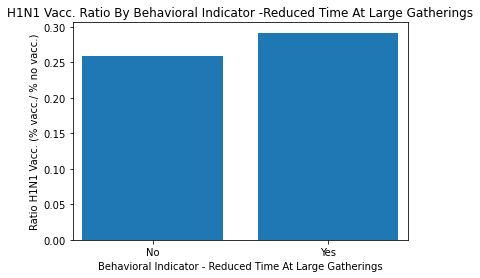

In [1890]:
plt.figure()
plt.bar(x = ([1,2]) , height = ratio_h1n1('behavioral_large_groups').tolist())
plt.xlabel('Behavioral Indicator - Reduced Time At Large Gatherings')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(3), ('0','No', 'Yes'))
plt.title('H1N1 Vacc. Ratio By Behavioral Indicator -Reduced Time At Large Gatherings')
plt.margins(x = 0.03)
plt.show()

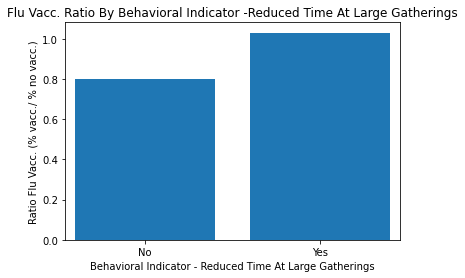

In [1891]:
plt.figure()
plt.bar(x = ([1,2]) , height = ratio_seasonal('behavioral_large_groups').tolist())
plt.xlabel('Behavioral Indicator - Reduced Time At Large Gatherings')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(3), ('0','No', 'Yes'))
plt.title('Flu Vacc. Ratio By Behavioral Indicator -Reduced Time At Large Gatherings')
plt.margins(x = 0.03)
plt.show()

#### Behavioral Indicator - Bought A Face Mask

In [1892]:
#Convert to int values
df2['behavioral_f_mask'] = df2['behavioral_f_mask'].astype(int)

<ipython-input-1892-66c2fa60ef7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['behavioral_f_mask'] = df2['behavioral_f_mask'].astype(int)


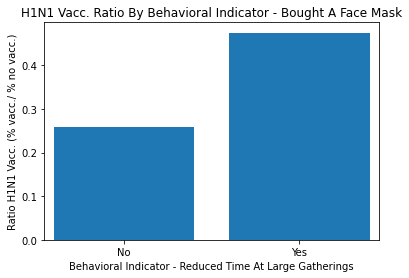

In [1893]:
plt.figure()
plt.bar(x = ([1,2]) , height = ratio_h1n1('behavioral_f_mask').tolist())
plt.xlabel('Behavioral Indicator - Reduced Time At Large Gatherings')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(3), ('0','No', 'Yes'))
plt.title('H1N1 Vacc. Ratio By Behavioral Indicator - Bought A Face Mask')
plt.margins(x = 0.03)
plt.show()

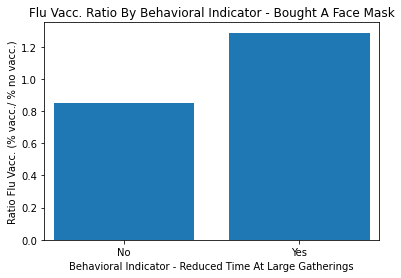

In [1894]:
plt.figure()
plt.bar(x = ([1,2]) , height = ratio_seasonal('behavioral_f_mask').tolist())
plt.xlabel('Behavioral Indicator - Reduced Time At Large Gatherings')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(3), ('0','No', 'Yes'))
plt.title('Flu Vacc. Ratio By Behavioral Indicator - Bought A Face Mask')
plt.margins(x = 0.03)
plt.show()

#### Behavioral Indicator - Reduced Contact Outside the Home

In [1895]:
#Convert to int values
df2['behavioral_out_home'] = df2['behavioral_out_home'].astype(int)

<ipython-input-1895-ec77b40b5931>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['behavioral_out_home'] = df2['behavioral_out_home'].astype(int)


In [1896]:
df2['behavioral_out_home'] = df2['behavioral_out_home'].astype(int)
df2['behavioral_out_home'].dtypes

<ipython-input-1896-ce10b303acd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['behavioral_out_home'] = df2['behavioral_out_home'].astype(int)


dtype('int64')

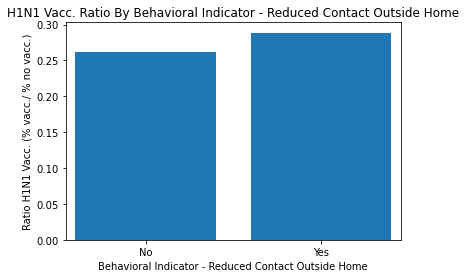

In [1897]:
plt.figure()
plt.bar(x = ([1,2]) , height = ratio_h1n1('behavioral_out_home').tolist())
plt.xlabel('Behavioral Indicator - Reduced Contact Outside Home')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(3), ('0','No', 'Yes'))
plt.title('H1N1 Vacc. Ratio By Behavioral Indicator - Reduced Contact Outside Home')
plt.margins(x = 0.03)
plt.show()

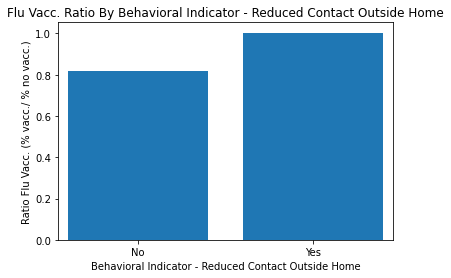

In [1898]:
plt.figure()
plt.bar(x = ([1,2]) , height = ratio_seasonal('behavioral_out_home').tolist())
plt.xlabel('Behavioral Indicator - Reduced Contact Outside Home')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(3), ('0','No', 'Yes'))
plt.title('Flu Vacc. Ratio By Behavioral Indicator - Reduced Contact Outside Home')
plt.margins(x = 0.03)
plt.show()

Across each behavioral indicator we can see that there are trends showing if someone reduces their time at large gatherings, buys a face mask, and reduces their contact outside the home it is more likely they will receive a vaccine. This is the trend we would expect, as these behaviors show someone is taking these viruses seriously and is concerned.

### Opinions

#### Opinion - Is the Seasonal Flu Vaccine Effective

In [1899]:
#Convert to int values
df2['opinion_flu_effective'] = df2['opinion_flu_effective'].astype(int)

<ipython-input-1899-d3086f4d9a0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['opinion_flu_effective'] = df2['opinion_flu_effective'].astype(int)


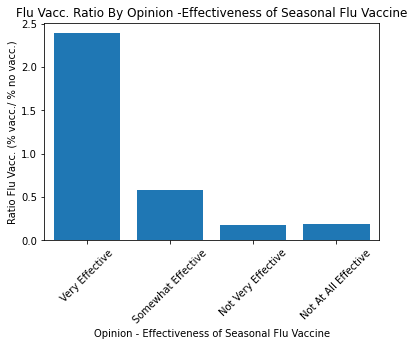

In [1900]:
plt.figure()
plt.bar(x = ([1,2,3,4]) , height = ratio_seasonal('opinion_flu_effective').tolist())
plt.xlabel('Opinion - Effectiveness of Seasonal Flu Vaccine')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(5), ('0','Very Effective', 'Somewhat Effective','Not Very Effective','Not At All Effective'), rotation = 45)
plt.title('Flu Vacc. Ratio By Opinion -Effectiveness of Seasonal Flu Vaccine')
plt.margins(x = 0.03)
plt.show()

#### Opinion - Is the H1N1 Vaccine Effective

In [1901]:
#Convert to int values
df2['opinion_h1n1_effective'] = df2['opinion_h1n1_effective'].astype(int)

<ipython-input-1901-93dedd00ea05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['opinion_h1n1_effective'] = df2['opinion_h1n1_effective'].astype(int)


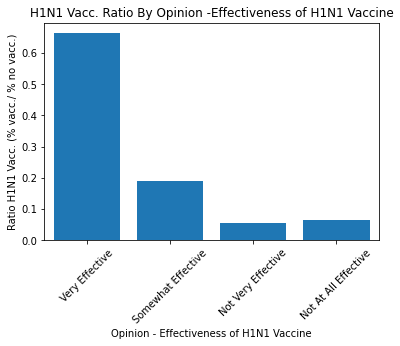

In [1902]:
plt.figure()
plt.bar(x = ([1,2,3,4]) , height = ratio_h1n1('opinion_h1n1_effective').tolist())
plt.xlabel('Opinion - Effectiveness of H1N1 Vaccine')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(5), ('0','Very Effective', 'Somewhat Effective','Not Very Effective','Not At All Effective'), rotation = 45)
plt.title('H1N1 Vacc. Ratio By Opinion -Effectiveness of H1N1 Vaccine')
plt.margins(x = 0.03)
plt.show()

#### Opinion - Risk of Getting Sick Without Seasonal Flu Vacinne

In [1903]:
#Convert to int values
df2['opinion_flu_risk'] = df2['opinion_flu_risk'].astype(int)

<ipython-input-1903-cb363e81e5a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['opinion_flu_risk'] = df2['opinion_flu_risk'].astype(int)


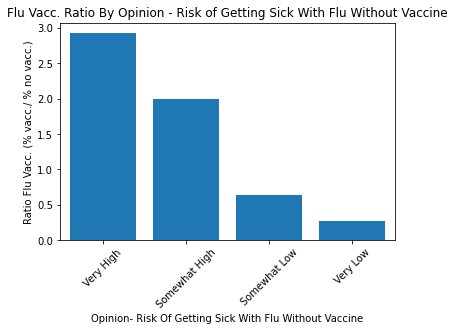

In [1904]:
plt.figure()
plt.bar(x = ([1,2,3,4]) , height = ratio_seasonal('opinion_flu_risk').tolist())
plt.xlabel('Opinion- Risk Of Getting Sick With Flu Without Vaccine')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(5), ('0','Very High', 'Somewhat High','Somewhat Low','Very Low'), rotation = 45)
plt.title('Flu Vacc. Ratio By Opinion - Risk of Getting Sick With Flu Without Vaccine')
plt.margins(x = 0.03)
plt.show()

#### Opinion - Risk of Getting Sick Without H1N1 Vaccine

In [1905]:
#Convert to int values
df2['opinion_h1n1_risk'] = df2['opinion_h1n1_risk'].astype(int)

<ipython-input-1905-ded6b901f41f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['opinion_h1n1_risk'] = df2['opinion_h1n1_risk'].astype(int)


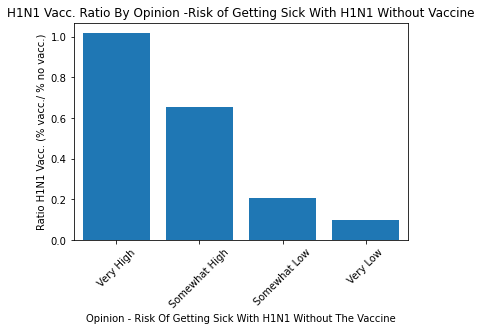

In [1906]:
plt.figure()
plt.bar(x = ([1,2,3,4]) , height = ratio_h1n1('opinion_h1n1_risk').tolist())
plt.xlabel('Opinion - Risk Of Getting Sick With H1N1 Without The Vaccine')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(5), ('0','Very High', 'Somewhat High','Somewhat Low','Very Low'), rotation = 45)
plt.title('H1N1 Vacc. Ratio By Opinion -Risk of Getting Sick With H1N1 Without Vaccine')
plt.margins(x = 0.03)
plt.show()

#### Opinion - Risk of Getting Sick From Flu Vaccine

In [1907]:
df2['opinion_sick_from_f_vacc'] = df2['opinion_sick_from_f_vacc'].astype(int)

<ipython-input-1907-b3bafd2249f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['opinion_sick_from_f_vacc'] = df2['opinion_sick_from_f_vacc'].astype(int)


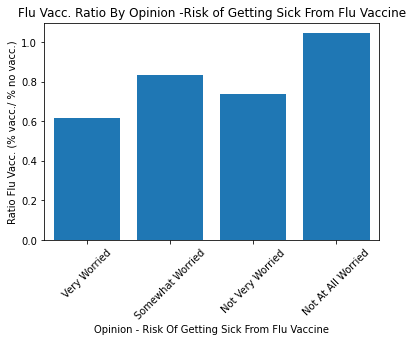

In [1908]:
plt.figure()
plt.bar(x = ([1,2,3,4]) , height = ratio_seasonal('opinion_sick_from_f_vacc').tolist())
plt.xlabel('Opinion - Risk Of Getting Sick From Flu Vaccine')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(5), ('0','Very Worried', 'Somewhat Worried','Not Very Worried','Not At All Worried'), rotation = 45)
plt.title('Flu Vacc. Ratio By Opinion -Risk of Getting Sick From Flu Vaccine')
plt.margins(x = 0.03)
plt.show()

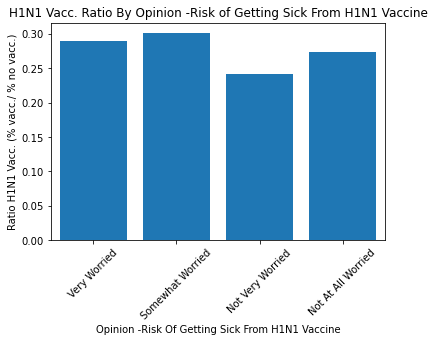

In [1909]:
plt.figure()
plt.bar(x = ([1,2,3,4]) , height = ratio_h1n1('opinion_sick_from_f_vacc').tolist())
plt.xlabel('Opinion -Risk Of Getting Sick From H1N1 Vaccine')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(5), ('0','Very Worried', 'Somewhat Worried','Not Very Worried','Not At All Worried'), rotation = 45)
plt.title('H1N1 Vacc. Ratio By Opinion -Risk of Getting Sick From H1N1 Vaccine')
plt.margins(x = 0.03)
plt.show()

#### Opinion - Risk of Getting Sick From H1N1 Vaccine

In [1910]:
df2['opinion_sick_from_h1n1_vacc'] = df2['opinion_sick_from_h1n1_vacc'].astype(int)

<ipython-input-1910-71eba4fe5f28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['opinion_sick_from_h1n1_vacc'] = df2['opinion_sick_from_h1n1_vacc'].astype(int)


In [1911]:
ratio_h1n1('opinion_sick_from_h1n1_vacc').tolist()

[0.3966789667896679,
 0.3443191673894189,
 0.2152193924516723,
 0.2573960554371002]

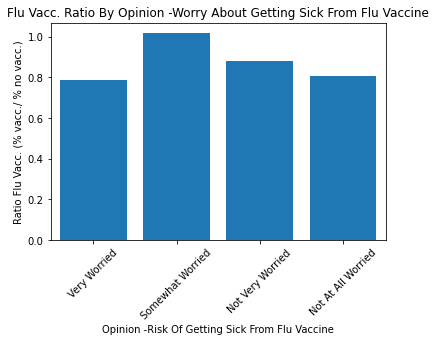

In [1912]:
plt.figure()
plt.bar(x = ([1,2,3,4]) , height = ratio_seasonal('opinion_sick_from_h1n1_vacc').tolist())
plt.xlabel('Opinion -Risk Of Getting Sick From Flu Vaccine')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(5), ('0','Very Worried', 'Somewhat Worried','Not Very Worried','Not At All Worried'), rotation = 45)
plt.title('Flu Vacc. Ratio By Opinion -Worry About Getting Sick From Flu Vaccine')
plt.margins(x = 0.03)
plt.show()

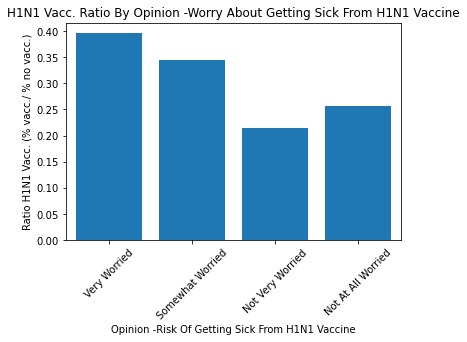

In [1913]:
plt.figure()
plt.bar(x = ([1,2,3,4]) , height = ratio_h1n1('opinion_sick_from_h1n1_vacc').tolist())
plt.xlabel('Opinion -Risk Of Getting Sick From H1N1 Vaccine')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(5), ('0','Very Worried', 'Somewhat Worried','Not Very Worried','Not At All Worried'), rotation = 45)
plt.title('H1N1 Vacc. Ratio By Opinion -Worry About Getting Sick From H1N1 Vaccine')
plt.margins(x = 0.03)
plt.show()

The opinion questions above give a deeper insight into factors that play a role in people not receiving a vaccine. These factors can be used to inform the content of the educational campaigns. There are lower ratios for people who believe the vaccine is not very effective (both H1N1 and seasonal flu) and lower ratios for people who believe there's not a big risk of getting sick if they don't get the vaccine. It is also recognised that being worried about getting sick from the vaccine does not play a huge role in whether people get it or not. This is not what I would have expected, I thought it would have a bigger impact. Maybe this has something to do with psychology, if it makes them sick they think it's working. These factors should all inform what is addressed in the educational campaign.

### Social and Economic Factors

#### Age Group

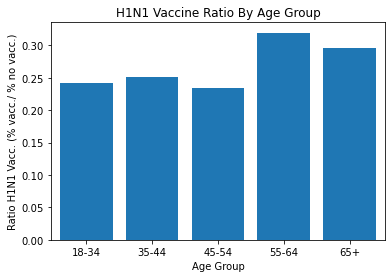

In [1914]:
plt.figure()
plt.bar(x = ([1,2,3,4,5]) , height = ratio_h1n1('age_group').tolist())
plt.xlabel('Age Group')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(6), ('0','18-34', '35-44','45-54','55-64','65+'))
plt.title('H1N1 Vaccine Ratio By Age Group')
plt.margins(x = 0.03)
plt.show()

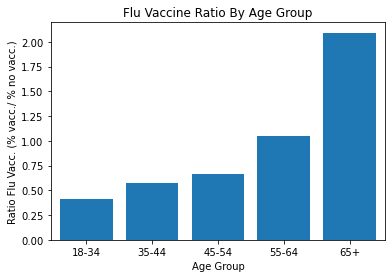

In [1915]:
plt.figure()
plt.bar(x = ([1,2,3,4,5]) , height = ratio_seasonal('age_group').tolist())
plt.xlabel('Age Group')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(6), ('0','18-34', '35-44','45-54','55-64','65+'))
plt.title('Flu Vaccine Ratio By Age Group')
plt.margins(x = 0.03)
plt.show()

Age group proves to be a big indicator in who is likely to receive a flu vaccine. There is a large gap in the ratio of people receiving flu shots that are 18-34 years old compared to those 65+. This is likely due to the flu having a greater risk of complications and being more severe in the older population. Therefore, they are more proactive in protecting themselves against it. We will likely see a similar trend with COVID, like the flu, it disciminates against age. 

Examining the H1N1 vaccine ratio by age group, there is not as large of an effect. Influenza had the largest impact on the younger generation, 80% of deaths occured below the age of 65+. 

#### Education Level

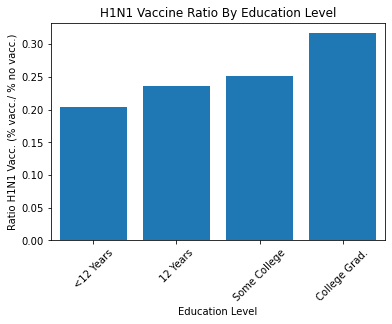

In [1916]:
plt.figure()
plt.bar(x = ([1,2,3,4]) , height = ratio_h1n1('education_level').tolist())
plt.xlabel('Education Level')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(5), (' ','<12 Years','12 Years', 'Some College','College Grad.'), rotation = 45)
plt.title('H1N1 Vaccine Ratio By Education Level')
plt.margins(x = 0.03)
plt.show()

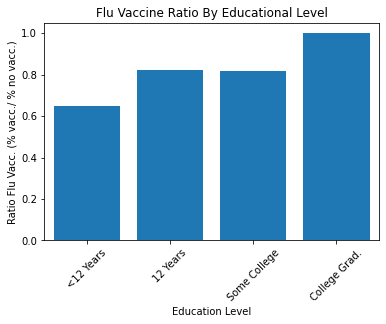

In [1917]:
plt.figure()
plt.bar(x = ([1,2,3,4]) , height = ratio_seasonal('education_level').tolist())
plt.xlabel('Education Level')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(5), (' ','<12 Years','12 Years', 'Some College','College Grad.'), rotation = 45)
plt.title('Flu Vaccine Ratio By Educational Level')
plt.margins(x = 0.03)
plt.show()

There is a trend among both graphs that show the more educated a person is the more likely they are to get a vaccine. 

#### Household Income

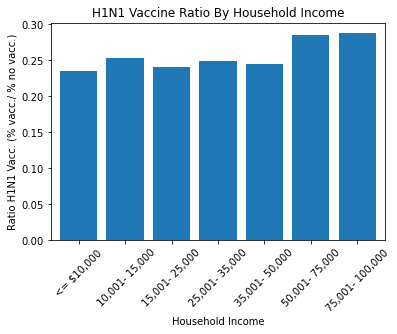

In [1918]:
plt.figure()
plt.bar(x = ([1,2,3,4,5,6,7]) , height = ratio_h1n1('household_income').tolist())
plt.xlabel('Household Income')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(8), (' ','<= $10,000',' 10,001- 15,000', '15,001- 25,000','25,001- 35,000','35,001- 50,000','50,001- 75,000','75,001- 100,000'), rotation = 45)
plt.title('H1N1 Vaccine Ratio By Household Income')
plt.margins(x = 0.03)
plt.show()

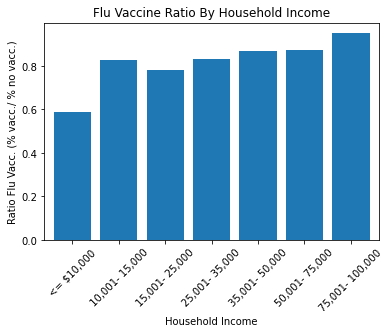

In [1919]:
plt.figure()
plt.bar(x = ([1,2,3,4,5,6,7]) , height = ratio_seasonal('household_income').tolist())
plt.xlabel('Household Income')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(8), (' ','<= $10,000',' 10,001- 15,000', '15,001- 25,000','25,001- 35,000','35,001- 50,000','50,001- 75,000','75,001- 100,000'), rotation = 45)
plt.title('Flu Vaccine Ratio By Household Income')
plt.margins(x = 0.03)
plt.show()

As can be seen in both graphs above, the higher the household income the higher the ratio of people receiving vaccines. This reinforces the trend we saw above in the education level category, typically income and education level go hand in hand.

#### Marital Status

In [1920]:
#Convert to int
df2['work_status'] = df2['work_status'].astype(int)

<ipython-input-1920-4b19a7da0108>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['work_status'] = df2['work_status'].astype(int)


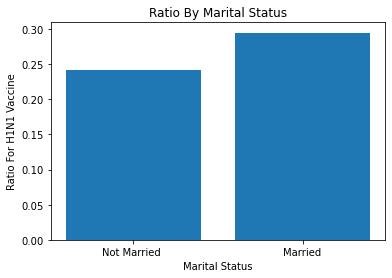

In [1921]:
plt.figure()
plt.bar(x = ([1,2]) , height = ratio_h1n1('marital_status').tolist())
plt.xlabel('Marital Status')
plt.ylabel('Ratio For H1N1 Vaccine')
plt.xticks(np.arange(3), (' ','Not Married ','Married'))
plt.title('Ratio By Marital Status')
plt.margins(x = 0.05)
plt.show()

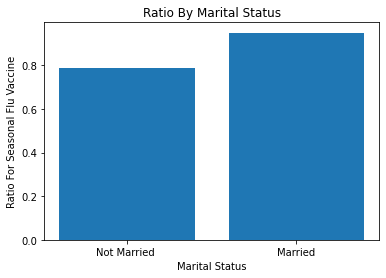

In [1922]:
plt.figure()
plt.bar(x = ([1,2]) , height = ratio_seasonal('marital_status').tolist())
plt.xlabel('Marital Status')
plt.ylabel('Ratio For Seasonal Flu Vaccine')
plt.xticks(np.arange(3), (' ','Not Married ','Married'))
plt.title('Ratio By Marital Status')
plt.margins(x = 0.05)
plt.show()

Both the H1N1 vaccine and seasonal flu vaccine ratios show there is an increase in married couples getting vaccinated over singles. This could be related to age, as older people are more likely to receive a vaccine. Also, gender might play a role, females are more likely to get vaccinated than males, so wives could be encouraging their husbads to get vaccinated. Happy wife, happy life!

#### Rent Or Own

In [1923]:
df2['rent_or_own'] = df2['rent_or_own'].astype(int)

<ipython-input-1923-501c738ec22d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rent_or_own'] = df2['rent_or_own'].astype(int)


In [1924]:
df2['rent_or_own'].unique()

array([2, 1])

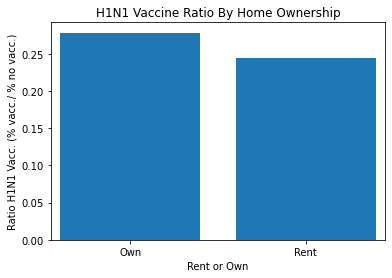

In [1925]:
plt.figure()
plt.bar(x = ([1,2]) , height = ratio_h1n1('rent_or_own').tolist())
plt.xlabel('Rent or Own')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(3), ('0','Own', 'Rent'))
plt.title('H1N1 Vaccine Ratio By Home Ownership')
plt.margins(x = 0.03)
plt.show()

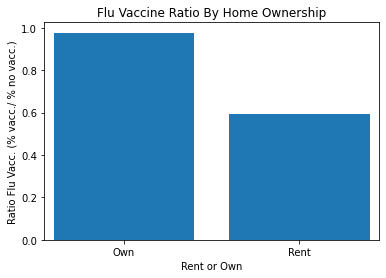

In [1926]:
plt.figure()
plt.bar(x = ([1,2]) , height = ratio_seasonal('rent_or_own').tolist())
plt.xlabel('Rent or Own')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(3), ('0','Own', 'Rent'))
plt.title('Flu Vaccine Ratio By Home Ownership')
plt.margins(x = 0.03)
plt.show()

The analysis above shows those who own a house get vaccinated at a higher ratio than those who rent or make other arrangements. 

#### Work Status

In [1927]:
df2['work_status'] = df2['work_status'].astype(int)

<ipython-input-1927-4b19a7da0108>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['work_status'] = df2['work_status'].astype(int)


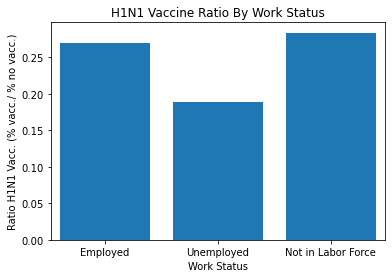

In [1928]:
plt.figure()
plt.bar(x = ([1,2,3]) , height = ratio_h1n1('work_status').tolist())
plt.xlabel('Work Status')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(4), ('0','Employed', 'Unemployed', 'Not in Labor Force'))
plt.title('H1N1 Vaccine Ratio By Work Status')
plt.margins(x = 0.03)
plt.show()

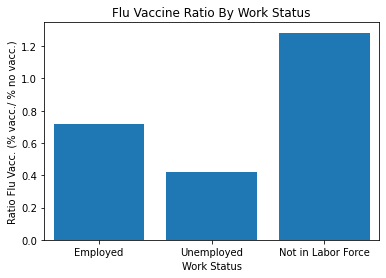

In [1929]:
plt.figure()
plt.bar(x = ([1,2,3]) , height = ratio_seasonal('work_status').tolist())
plt.xlabel('Work Status')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(4), ('0','Employed', 'Unemployed', 'Not in Labor Force'))
plt.title('Flu Vaccine Ratio By Work Status')
plt.margins(x = 0.03)
plt.show()

The ratio of people receiving flu vaccinations is highest for the population not in the labor force. This is likely due to the high percentage of seniors receiving the vaccine, most of whom would be retired. For the H1N1 vaccine, this trend holds true, although is less pronounced.

#### Race

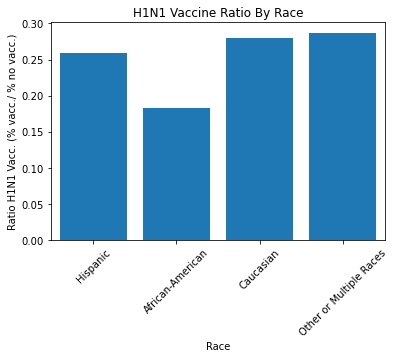

In [1931]:
plt.figure()
plt.bar(x = ([1,2,3,4]) , height = ratio_h1n1('race').tolist())
plt.xlabel('Race')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(5), ('0','Hispanic', 'African-American','Caucasian','Other or Multiple Races'), rotation = 45)
plt.title('H1N1 Vaccine Ratio By Race')
plt.margins(x = 0.03)
plt.show()

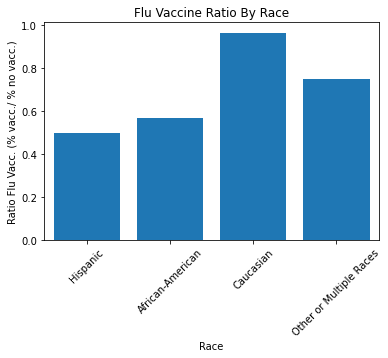

In [1932]:
plt.figure()
plt.bar(x = ([1,2,3,4]) , height = ratio_seasonal('race').tolist())
plt.xlabel('Race')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(5), ('0','Hispanic', 'African-American','Caucasian','Other or Multiple Races'), rotation = 45)
plt.title('Flu Vaccine Ratio By Race')
plt.margins(x = 0.03)
plt.show()

We can see above that Hispanic, Caucasian and other/multiple races received the vaccines at similar numbers. However, there is a much lower ratio among African-Americans, this lower number can be attributed to a number of reasons such as discrimination, safety concerns and barriers to access. In 1932-1973, the US Public Health Service conducted the Tuskegee Syphillis Experiment. They recruited African-American men to study the effects of untreated syphillis, they lied about the reason for the study and then witheld available treatments from these men. This provides just a glimpse of the abuse that African Americans have experienced from the US Health system and gives some insight into why there is less vaccine trust among this group. 

For the flu vaccine, people of colour receive the vaccine at a much lower ratio. This informs us that we need to focus the educational campaign on limiting barriers to access as well as focus on building the trust between the Government and these communities.

#### Sex

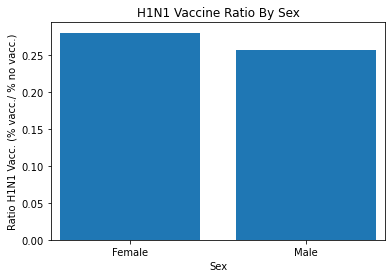

In [1934]:
plt.figure()
plt.bar(x = ([1,2]) , height = ratio_h1n1('sex').tolist())
plt.xlabel('Sex')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(3), ('0','Female', 'Male'))
plt.title('H1N1 Vaccine Ratio By Sex')
plt.margins(x = 0.03)
plt.show()

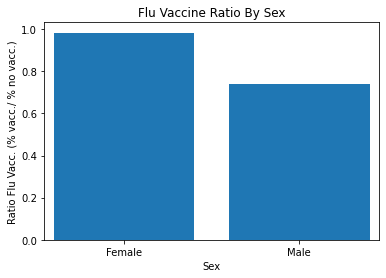

In [1935]:
plt.figure()
plt.bar(x = ([1,2]) , height = ratio_seasonal('sex').tolist())
plt.xlabel('Sex')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(3), ('0','Female', 'Male'))
plt.title('Flu Vaccine Ratio By Sex')
plt.margins(x = 0.03)
plt.show()

The ratios for males and females receiving the H1N1 vaccine are similar, with females having a slight lead, this lead grows larger for the flu vaccine.

#### MSA Status

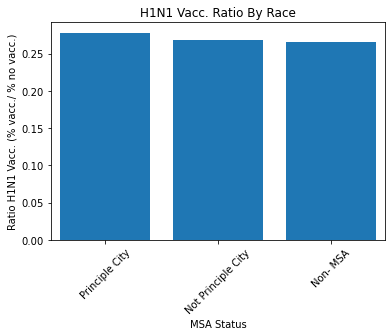

In [1936]:
plt.figure()
plt.bar(x = ([1,2,3]) , height = ratio_h1n1('msa_status').tolist())
plt.xlabel('MSA Status')
plt.ylabel('Ratio H1N1 Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(4), ('0','Principle City', 'Not Principle City','Non- MSA'), rotation = 45)
plt.title('H1N1 Vacc. Ratio By Race')
plt.margins(x = 0.03)
plt.show()

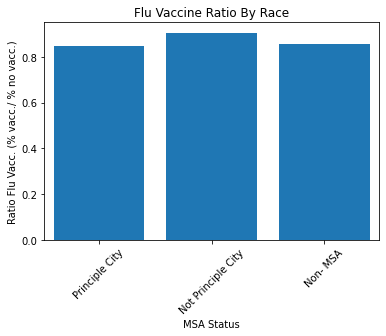

In [1937]:
plt.figure()
plt.bar(x = ([1,2,3]) , height = ratio_seasonal('msa_status').tolist())
plt.xlabel('MSA Status')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
plt.xticks(np.arange(4), ('0','Principle City', 'Not Principle City','Non- MSA'), rotation = 45)
plt.title('Flu Vaccine Ratio By Race')
plt.margins(x = 0.03)
plt.show()

As can be seen above, there are no patterns or trends to be found in this data for either of the vaccines. This will not make it very useful for our model so it will be dropped.

In [1938]:
#Since there is not much variance in the MSA variable, we will drop this column
df2 = df2.drop(columns = 'msa_status', axis = 1)

#### State

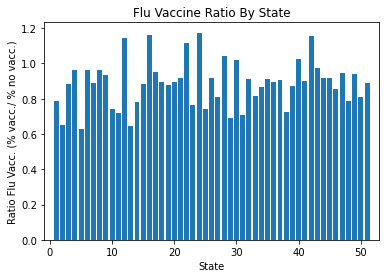

In [1940]:
plt.figure()
plt.bar(x = np.arange(1,52) , height = ratio_seasonal('state').tolist())
plt.xlabel('State')
plt.ylabel('Ratio Flu Vacc. (% vacc./ % no vacc.)')
#plt.xticks(np.arange(56), rotation = 45)
plt.title('Flu Vaccine Ratio By State')
plt.margins(x = 0.03)
plt.show()

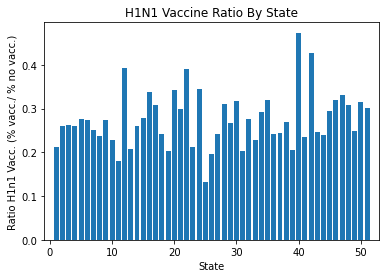

In [1941]:
plt.figure()
plt.bar(x = np.arange(1,52) , height = ratio_h1n1('state').tolist())
plt.xlabel('State')
plt.ylabel('Ratio H1n1 Vacc. (% vacc./ % no vacc.)')
#plt.xticks(np.arange(56), rotation = 45)
plt.title('H1N1 Vaccine Ratio By State')
plt.margins(x = 0.03)
plt.show()

The state where someone lives proves to be a good indicator in whether someone will receive a vaccine. This could be due to a number of factors, including accessibility and demographic. Depending on the demographic in the state, one which has an older population, would likely have a higher ratio. Also some states put more funding into vaccines and increasing the accessibility of them.

In [2007]:
#Confirm all variables are integers before modelling
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55615 entries, 0 to 70943
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   h1n1_vaccine                 55615 non-null  int64
 1   seasonal_vaccine             55615 non-null  int64
 2   behavioral_large_groups      55615 non-null  int64
 3   behavioral_f_mask            55615 non-null  int64
 4   behavioral_out_home          55615 non-null  int64
 5   opinion_flu_effective        55615 non-null  int64
 6   opinion_flu_risk             55615 non-null  int64
 7   opinion_sick_from_f_vacc     55615 non-null  int64
 8   opinion_h1n1_effective       55615 non-null  int64
 9   opinion_h1n1_risk            55615 non-null  int64
 10  opinion_sick_from_h1n1_vacc  55615 non-null  int64
 11  age_group                    55615 non-null  int32
 12  education_level              55615 non-null  int64
 13  household_income             55615 non-null  i

### Dummy Variables

Most columns within the data are binary or in a sequential order so will be left in their numeric forms. However, race and state need to be converted to dummy variables

In [1943]:
#Convert the target variables to integers
df2['h1n1_vaccine'] = df2['h1n1_vaccine'].astype(int)
df2['seasonal_vaccine'] = df2['seasonal_vaccine'].astype(int)

In [1944]:
#Convert all columns which are not in a logical order of rank to dummy variables
df_dummy = pd.get_dummies(data=df2, columns=['race','state'], drop_first = True)

In [1945]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55615 entries, 0 to 70943
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   h1n1_vaccine                 55615 non-null  int64
 1   seasonal_vaccine             55615 non-null  int64
 2   behavioral_large_groups      55615 non-null  int64
 3   behavioral_f_mask            55615 non-null  int64
 4   behavioral_out_home          55615 non-null  int64
 5   opinion_flu_effective        55615 non-null  int64
 6   opinion_flu_risk             55615 non-null  int64
 7   opinion_sick_from_f_vacc     55615 non-null  int64
 8   opinion_h1n1_effective       55615 non-null  int64
 9   opinion_h1n1_risk            55615 non-null  int64
 10  opinion_sick_from_h1n1_vacc  55615 non-null  int64
 11  age_group                    55615 non-null  int32
 12  education_level              55615 non-null  int64
 13  household_income             55615 non-null  i

## Modelling

In [1946]:
#Import train test split
from sklearn.model_selection import train_test_split

In [1948]:
#Set independent and dependent variables
X = df_dummy.iloc[:, 2: df_dummy.shape[0]+1]
y = df_dummy.iloc[:, 0:2]

In [1949]:
#Perform train test split, 80% remainder, 20% test
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, stratify = y)

In [1950]:
#Perform train test split to get the validation and trainsing set, 30% split
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size = 0.3, random_state = 2, stratify = y_remainder)

In [1951]:
#Put the validation set in a dataframe so I can visualize and work with it easier
df_validation = pd.concat([y_validation, X_validation], axis = 1)
df_validation

,h1n1_vaccine,seasonal_vaccine,behavioral_large_groups,behavioral_f_mask,behavioral_out_home,opinion_flu_effective,opinion_flu_risk,opinion_sick_from_f_vacc,opinion_h1n1_effective,opinion_h1n1_risk,...,state_45,state_46,state_47,state_48,state_49,state_50,state_52,state_53,state_54,state_55
62056,1,1,1,0,1,2,3,4,2,3,...,0,0,0,0,0,0,0,0,0,0
1948,0,1,0,0,0,1,3,4,2,3,...,0,0,0,0,0,0,0,0,0,0
41592,0,1,0,0,0,2,3,2,2,4,...,0,0,0,0,0,0,0,0,0,0
36916,0,0,0,0,0,2,4,4,2,4,...,0,0,0,0,0,0,0,0,0,0
38445,0,1,1,0,1,1,3,2,2,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45355,0,0,0,0,0,2,2,2,2,3,...,0,0,0,0,0,0,0,0,0,0
10337,0,0,0,0,0,3,3,2,2,3,...,0,0,0,0,0,0,0,0,0,0
69635,0,0,0,0,0,3,4,4,3,4,...,0,0,0,0,0,0,0,0,0,0
52365,1,1,0,0,0,2,3,4,1,3,...,0,0,0,0,0,0,0,0,0,0


### Upsampling

As mentioned above, because there is a class imbalance between people who received the H1N1 vaccine and those who did not, the training data needs to be upsampled.

In [1952]:
#Split the training data into minority and majority classes
train_df = pd.concat([y_train, X_train], axis = 1)
minority = train_df[train_df.h1n1_vaccine == 1]
majority = train_df[train_df.h1n1_vaccine ==0]

In [1953]:
#Upsample the minority class so it is the same size as the majority
from sklearn.utils import resample
df_minority_upsampled = resample(minority,
                                replace = True,
                                n_samples = majority.shape[0],
                                random_state = 1
                                )

In [1954]:
#Construct a dataframe with the upsampled data
df_upsampled = pd.concat([majority, df_minority_upsampled])
df_upsampled

,h1n1_vaccine,seasonal_vaccine,behavioral_large_groups,behavioral_f_mask,behavioral_out_home,opinion_flu_effective,opinion_flu_risk,opinion_sick_from_f_vacc,opinion_h1n1_effective,opinion_h1n1_risk,...,state_45,state_46,state_47,state_48,state_49,state_50,state_52,state_53,state_54,state_55
68261,0,1,1,0,0,1,3,2,1,4,...,0,0,1,0,0,0,0,0,0,0
59263,0,0,0,0,0,1,3,4,1,3,...,0,0,0,0,0,0,0,0,0,0
21689,0,0,0,0,0,3,3,2,2,3,...,0,0,0,0,0,0,0,0,0,0
3915,0,1,0,0,0,2,4,2,4,4,...,0,0,0,0,0,0,0,0,0,0
48421,0,1,0,0,0,1,3,3,2,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58303,1,1,1,0,1,1,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
66458,1,1,0,0,0,1,2,4,1,3,...,0,0,0,0,0,0,0,0,0,0
62980,1,0,1,0,1,1,4,2,1,4,...,0,0,0,0,0,0,0,0,1,0
42902,1,1,0,0,0,1,2,2,1,3,...,0,0,0,0,0,0,0,0,0,0


In [1955]:
#Define X and Y upsampled training data
X_train_us = df_upsampled.iloc[:,2:74]
y_train_us = df_upsampled.iloc[:,0:2]

In [1956]:
#Scale upsampled X and Y variable data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train_us)
X_train_us_ss = ss.transform(X_train_us)

### Multioutput Classifier

The end goal of my capstone is to build a model to predict whether a person will receive the COVID-19 vaccine. To do this, I will need to employ multi-task learning. Multi-task learning works by forcing the model to predict two target variables at once. In doing this, it introduces regularization into the model, preventing it from overfitting on one of the targets. By training my model to make a more general vaccine prediction, I will be able to use it to predict whether someone will receive the COVID-19 vaccine.

This model requires multilabel classification as it needs to predict two targets at the same time. The targets are not mutually exclusive, the respondent might have got both vaccines, one or none. A multiouput classifier essentially acts as a wrapper on a traditional model such as logistic regression or decision tree so it is able to predict both targets at once. 

#### Logistic Regression

Unlike decision tree or random forest, the data for logistic regression should be scaled.

In [1957]:
#Import packages
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
#Define the model
logreg = MultiOutputClassifier(estimator = LogisticRegression())
#Fit
logreg.fit(X_train_us_ss, y_train_us)
#Predictions
predictions = logreg.predict(X_validation)
#Score
print(logreg.score(X_train_us_ss, y_train_us))
print(logreg.score(X_validation, y_validation))

0.569627998042095
0.36454899610428526


In [1958]:
#Define function to calculate the precision and recall
def precision_recall(v, h):
    precision = precision_score(v, h)
    recall = recall_score(v, h)
    return f'The precision is {precision} and recall is {recall}'
    

In [1959]:
#Import precision and recall packages
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#Calculate the precision and recall
precision_recall(predictions[:,0], X_validation.iloc[:,0])

'The precision is 0.06255301102629347 and recall is 0.44294294294294295'

In [1960]:
#Calculate the precision and recall for the Seasonal Flu target variable
precision_recall(predictions[:,1], X_validation.iloc[:,1])

'The precision is 0.9380630630630631 and recall is 0.06754236600989216'

The logistic regression with the multioutput classifier did not perform very well in either category of accuracy, precision, recall.

#### Decision Tree

In [1961]:
from sklearn.tree import DecisionTreeClassifier
DTree = MultiOutputClassifier(estimator = DecisionTreeClassifier(max_depth = 8))
DTree.fit(X_train_us, y_train_us)
predictions = DTree.predict(X_validation)
print(DTree.score(X_train_us, y_train_us))
print(DTree.score(X_validation, y_validation))

0.5888603361070321
0.5304165418040155


In [1962]:
#Calculate the precision and recall for the H1N1 target variable 
precision_recall(predictions[:,0], X_validation.iloc[:,0])

'The precision is 0.452078032230704 and recall is 0.40764818355640536'

In [1963]:
#Calculate the precision and recall for the seasonal flu vaccine variable
precision_recall(predictions[:,1], X_validation.iloc[:,1])

'The precision is 0.6204954954954955 and recall is 0.07539682539682539'

#### Random Forest 

In [1964]:
from sklearn.ensemble import RandomForestClassifier
RForest = MultiOutputClassifier(estimator = RandomForestClassifier(n_estimators = 100, max_depth = 13))
RForest.fit(X_train_us, y_train_us)
predictions = RForest.predict(X_validation)
print(RForest.score(X_train_us, y_train_us))
print(RForest.score(X_validation, y_validation))

0.6963819546418666
0.5869793227449805


In [1965]:
#Calculate the precision and recall for the H1N1 target variable 
precision_recall(predictions[:,0], X_validation.iloc[:,0])

'The precision is 0.3604749787955895 and recall is 0.4120213281628696'

In [1966]:
#Calculate the precision and recall for the seasonal flu vaccine variable
precision_recall(predictions[:,1], X_validation.iloc[:,1])

'The precision is 0.6452702702702703 and recall is 0.07911086566339914'

The results from the multiouput classifier are disappointing, the validation scores never reached above 50 and the precision and recall was very low for both targets. I also tried these models with different hyperparameters but the score did not reach above 60.

### Classifier Chain

The classifier chain is another multilabel classification tool which allows two target variables to be predicted using the same model. It works by predicting one of the targets and then incorporates that target into the independent variables to predict the second target. It also makes it possible to specify which order to predict them in, I chose to put the H1N1 target first as the class imbalance makes it more difficult for the model to pick up patterns on. It is beneficial for the model to use the seasonal flu vaccine variable for assistance in predicting this tougher target.

In [1967]:
#Import packages
from sklearn.multioutput import ClassifierChain

#### Logistic Regression

In [1968]:
#Define the model
LogReg = ClassifierChain(LogisticRegression(C = 0.1), order = [1,0])
#Fit the model on scaled data
LogReg.fit(X_train_us_ss, y_train_us)
precitions = LogReg.predict(X_validation)
print(LogReg.score(X_train_us_ss, y_train_us))
print(LogReg.score(X_validation, y_validation))

0.5829458312938489
0.35383578064129456


In [1969]:
#Calculate the precision and recall for the H1N1 target variable 
precision_recall(predictions[:,0], X_validation.iloc[:,0])

'The precision is 0.3604749787955895 and recall is 0.4120213281628696'

In [1970]:
#Calculate the precision and recall for the seasonal flu vaccine variable
precision_recall(predictions[:,1], X_validation.iloc[:,1])

'The precision is 0.6452702702702703 and recall is 0.07911086566339914'

After playing around with different values for the regularization coefficient, I was unable to reach a higher accuracy or precision score using logistic regression. The multiouput and classifier chain yielded very similar results. The high precision and low recall scores for this model show the model is being very lazy when it comes to the H1N1 target, even after upsampling. It is predicting a lot of the values to be zero as that is the class that is the class giving the most information to the model.

#### Decision Tree

In [1971]:
DTree = ClassifierChain(DecisionTreeClassifier(max_depth = 8), order = [1,0])
DTree.fit(X_train_us, y_train_us)
predictions_DT = DTree.predict(X_validation)
print(DTree.score(X_train_us, y_train_us))
print(DTree.score(X_validation, y_validation))

0.607297275248817
0.5492957746478874


In [1972]:
#Calculate the precision and recall for the H1N1 target variable 
precision_recall(predictions[:,0], y_validation.iloc[:,0])

'The precision is 0.6209081309398099 and recall is 0.42753271934076587'

In [1973]:
#Calculate the precision and recall for the seasonal flu vaccine variable
precision_recall(predictions[:,1], y_validation.iloc[:,1])

'The precision is 0.8083159415636538 and recall is 0.6951539417368494'

Although the decision tree produced similar accuracy scores to the logistic regression, it performed better as a whole. The precision and accuracy scores for both target variables are much higher.

#### Random Forest

In [1974]:
from sklearn.ensemble import RandomForestClassifier
RForest = ClassifierChain(RandomForestClassifier(n_estimators = 100, max_depth = 13))
RForest.fit(X_train_us, y_train_us)
predictions = RForest.predict(X_validation)
print(RForest.score(X_train_us, y_train_us))
print(RForest.score(X_validation, y_validation))

0.6977484092021536
0.5938717410848067


In [1975]:
#Calculate the precision and recall for the H1N1 target variable 
precision_recall(predictions[:,0], y_validation.iloc[:,0])

'The precision is 0.6205561422034495 and recall is 0.42471693567814983'

In [1976]:
#Calculate the precision and recall for the seasonal flu vaccine variable
precision_recall(predictions[:,1], y_validation.iloc[:,1])

'The precision is 0.7200192647294911 and recall is 0.7134902958956411'

Therefore, the classifier chain produced very similar results to the multioutput classifer so neither technique will be explored further.

### Neural Network

In [1977]:
#Import packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import binary_accuracy

In [1978]:
#Import evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve

After a number of iterations adjusting the number of hidden layers, nodes within these layers, and dropout rates I found the model shown below to be the most effective. I used the relu function for all layers except the last, the output layer uses the sigmoid function, this function does not require the targets to be mutually exclusive. I employed a dropout rate of 0.5 percent after each layer because it prevents overfitting, keeping the test and validation scores closer together.

I tried both SGD and Adam as optimizers but the most optimal accuracy scores were found when using Adam. The loss function was chosen to be BinaryCrossentropy as I have targets that are 0 and 1.

In [1979]:
#Create model
model = keras.models.Sequential()

#Declare hidden layers
model.add(layers.Dense(X_train_us.shape[1], activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))

#Declare Output Layer
model.add(layers.Dense(2, activation='sigmoid'))       

#Compile the model
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()]
)


In [1980]:
#Train the model using 100 epochs
history = model.fit(X_train_us, y_train_us, validation_data=(X_validation, y_validation), epochs= 100, verbose=1)

Epoch 1/100
1533/1533 [==============================] - 4s 3ms/step - loss: 0.6164 - binary_accuracy: 0.6619 - val_loss: 0.5785 - val_binary_accuracy: 0.6999
Epoch 2/100
1533/1533 [==============================] - 4s 3ms/step - loss: 0.5794 - binary_accuracy: 0.7041 - val_loss: 0.5761 - val_binary_accuracy: 0.7102
Epoch 3/100
1533/1533 [==============================] - 4s 3ms/step - loss: 0.5746 - binary_accuracy: 0.7072 - val_loss: 0.5754 - val_binary_accuracy: 0.7126
Epoch 4/100
1533/1533 [==============================] - 4s 3ms/step - loss: 0.5705 - binary_accuracy: 0.7118 - val_loss: 0.5750 - val_binary_accuracy: 0.7146
Epoch 5/100
1533/1533 [==============================] - 4s 3ms/step - loss: 0.5661 - binary_accuracy: 0.7147 - val_loss: 0.5902 - val_binary_accuracy: 0.7011
Epoch 6/100
1533/1533 [==============================] - 4s 3ms/step - loss: 0.5655 - binary_accuracy: 0.7152 - val_loss: 0.5718 - val_binary_accuracy: 0.7238
Epoch 7/100
1533/1533 [=======================

Evaluate the model, determine the accuracies for the train and test sets.

In [1981]:
# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_validation, y_validation, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {result[1]:.4f}") 

# Generate predictions
predictions_NN = model.predict(X_validation)

Train Accuracy: 0.7332
Validation Accuracy: 0.7174


In [1986]:
predictions_NN = np.where(predictions_NN>0.5, 1,0)

In [1987]:
#H1N1 precision and recall
precision_recall(predictions_NN[:,0], y_validation.iloc[:,0])

'The precision is 0.6863780359028511 and recall is 0.3806363458910794'

In [1988]:
#Seasonal flu vaccine precision and recall
precision_recall(predictions_NN[:,1], y_validation.iloc[:,1])

'The precision is 0.7790977685021673 and recall is 0.6974705375107789'

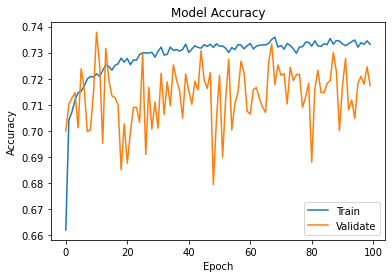

In [1982]:
# Plot accuracy for train and validation sets 
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'])
plt.show()

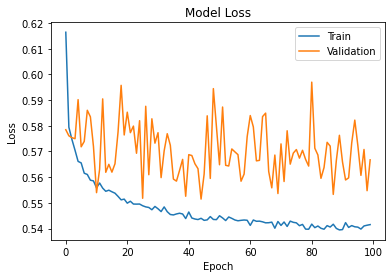

In [1983]:
#Plot loss for train and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

We can see that the train and validation accuracy scores and loss start to diverge at around 20-25 epochs. Therefore, we will choose 25 epochs to run for the final model. The precision for the H1N1 target is much higher than the recall for this model. Although I would like to optimize the precision, due to the applications of this model, it is still important to achieve more of a balance between the two. The thresholds effect on these variables will be explored below using the precision recall curve.

#### Precision Recall Curve

In [1984]:
#Import packagges
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve

n_classes = 2
precision = dict()
recall = dict()
average_precision = dict()
y_validation_curve = y_validation.copy().to_numpy()

#Calculate the precision recall curve and average precision score
for i in range(n_classes):
    precision[i], recall[i],_ = precision_recall_curve(y_validation_curve[:, i], predictions_NN[:, i])
    average_precision[i] = average_precision_score(y_validation_curve[:, i], predictions_NN[:, i])
    
#Calculate the micro scores for the precision and recall and then average these across all classes
precision["micro"], recall["micro"], _ = precision_recall_curve(y_validation_curve.ravel(), predictions_NN.ravel())
average_precision["micro"] = average_precision_score(y_validation_curve, predictions_NN, average="micro")

print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.68


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.68')

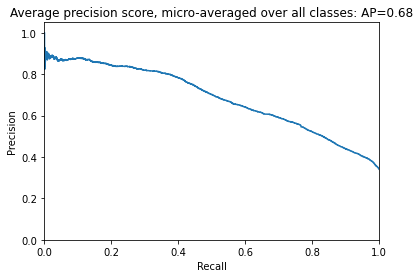

In [1985]:
#Plot the average precision score vs. recall
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))

The precision starts to significantly decrease after a threshold of 0.4. Therefore, to maximixe both of these scores, a threshold of 0.4 should be used. However, due to the applications of this model, we are focused on achieving a high precision. If the model is predicting someone will receive a vaccine, it is important this is right, otherwise this results in a missed opportunity for education and outreach. A lower recall score is still not desirable but has less of an impact, all it means is that a person who will receive the vaccine might still be marketed to. We will try and achieve a balance between maximizing both of these while still keeping precision high. Therefore, a threshold of 0.57 will be used.

#### Final Model 

The model that was constructed above will be used as the final version, using the test set to score it instead of the validation set. Instead of using 100 epochs, 25 will be used. This is based on the insights from the accuracy and loss graphs shown above.

In [1990]:
#Run model using 25 epochs
history = model.fit(X_train_us, y_train_us, validation_data=(X_test, y_test), epochs=25, verbose=1)

Epoch 1/25
1533/1533 [==============================] - 6s 4ms/step - loss: 0.5400 - binary_accuracy: 0.7334 - val_loss: 0.5687 - val_binary_accuracy: 0.7115
Epoch 2/25
1533/1533 [==============================] - 6s 4ms/step - loss: 0.5404 - binary_accuracy: 0.7337 - val_loss: 0.5743 - val_binary_accuracy: 0.7044
Epoch 3/25
1533/1533 [==============================] - 7s 4ms/step - loss: 0.5394 - binary_accuracy: 0.7347 - val_loss: 0.5587 - val_binary_accuracy: 0.7205
Epoch 4/25
1533/1533 [==============================] - 11s 7ms/step - loss: 0.5388 - binary_accuracy: 0.7348 - val_loss: 0.5645 - val_binary_accuracy: 0.7220
Epoch 5/25
1533/1533 [==============================] - 6s 4ms/step - loss: 0.5398 - binary_accuracy: 0.7344 - val_loss: 0.5654 - val_binary_accuracy: 0.7184
Epoch 6/25
1533/1533 [==============================] - 5s 3ms/step - loss: 0.5391 - binary_accuracy: 0.7355 - val_loss: 0.5719 - val_binary_accuracy: 0.7140
Epoch 7/25
1533/1533 [=============================

In [1991]:
# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_validation, y_validation, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}") 

# Generate predictions
predictions_NN = model.predict(X_test)

Train Accuracy: 0.7332
Test Accuracy: 0.7221


In [1993]:
predictions_NN = np.where(predictions_NN>0.57, 1,0)

In [1994]:
precision_recall(predictions_NN[:,0], y_test.iloc[:,0])

'The precision is 0.614702154626109 and recall is 0.4263111631995312'

In [1995]:
precision_recall(predictions_NN[:,1], y_test.iloc[:,1])

'The precision is 0.7082851637764933 and recall is 0.7332934370636346'

Based on the accuracy, precision and recall scores shown above we have created a great model. The accuracy scores are very close together for the train and test sets, meaning the model is not overfitting to the training set. The precision and recall scores are high for the seasonal flu vaccine target but still have room for improvement on the H1N1 vaccine. Steps to improve these scores will be explained below.

# Analysis for Improvement 

We would like to identify ways to improve the models precision on the H1N1 target. Due to the class imbalance, it has made it more difficult for the model to accuractely predict if someone received the vaccine. This will be explored further by plotting the correlation between the percent who received the vaccine and precision across each category. 

In [1996]:
def filtering(factor):
    precision_list = []
    count_h1n1 = []
    count_flu = []
    for i in range(X_test[factor].min(), X_test[factor].max() +1):
        idx = X_test.index[X_test[factor] == i].tolist()
        y_test_filter = y_test.loc[idx]
        predictions = model.predict(X_test.loc[idx])
        predictions = np.where(predictions>0.57, 1,0)
        precision_list.append(precision_score(predictions[:,0], y_test_filter.iloc[:,0]))
        count_h1n1.append((y_test_filter.iloc[:,0] ==1).sum()/y_test_filter.iloc[:,0].count())
        count_flu.append((y_test_filter.iloc[:,1] ==1).sum()/y_test_filter.iloc[:,1].count())
    plt.figure()
    plot1 = plt.scatter(count_h1n1, precision_list, s = 60)
    plt.xlabel('Percent Received H1N1 Vaccine')
    plt.ylabel('Precision')
    plt.title('Correlation Between Precision and Percentage Who Received Vaccine')
    plt.show()
    
    plt.figure()
    plot2 = plt.scatter(count_flu, precision_list, s = 60, color = 'darkorange')
    plt.xlabel('Percent Received Seasonal Flu Vaccine')
    plt.ylabel('Precision')
    plt.title('Correlation Between Precision and Percentage Who Received Vaccine')
    plt.show()
    return plot1,plot2,

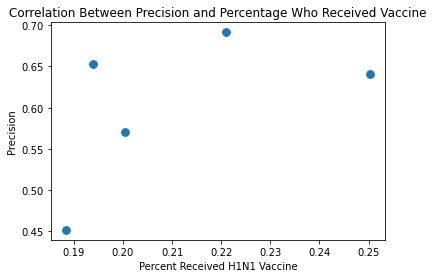

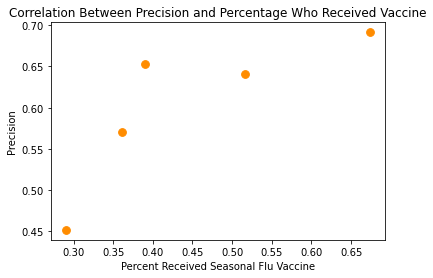

(<matplotlib.collections.PathCollection at 0x7f8cc3c859a0>,
 <matplotlib.collections.PathCollection at 0x7f8d9d4abc40>)

In [1999]:
#Plot the correlation for age group
filtering('age_group')

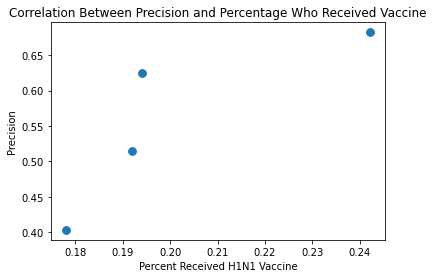

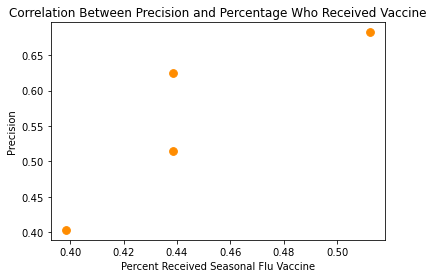

(<matplotlib.collections.PathCollection at 0x7f8d97e56700>,
 <matplotlib.collections.PathCollection at 0x7f8d970f1e20>)

In [2000]:
#Plot the correlation for education level
filtering('education_level')

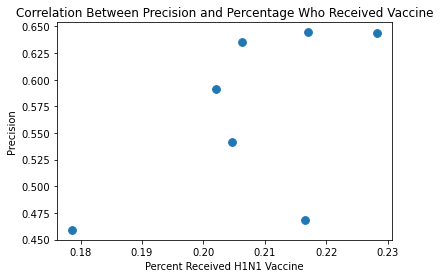

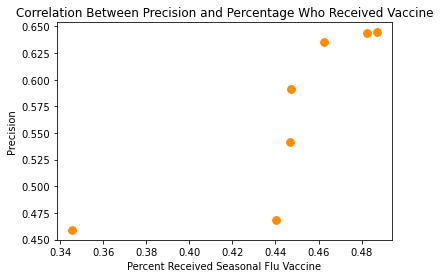

(<matplotlib.collections.PathCollection at 0x7f8ce39f23a0>,
 <matplotlib.collections.PathCollection at 0x7f8cbdaa6760>)

In [2001]:
#Plot the correaltion for household incomeb
filtering('household_income')

Looking at the plots above, we can see that there is a strong correlation between the percentage in each category that received the vaccine, and the precision of the model for that category. This shows that the class imbalance for the H1N1 target has a large impact on the precision of the model. If the amount of data is increased, the precision will follow.

## Conclusions

This model will be an integral part of reaching the high herd immunity rate needed to stop the spread of COVID-19. The exploratory data analysis gave an insight into who should be targeted with educational campaigns, public health outreach and increased accessibility to the vaccine. The ideal candidate would be a young, single, African-American male with less than a high school education. The exploratory data analysis also informed what information should be conveyed through these campaigns. It should include facts on why the vaccine is effective, the high risk of getting sick without a vaccine, and focus on building trust between the public health department and the African American community. In the past, there have been discriminatory and unjust practices that have led to this mistrust. The Tuskegee Syphillis Experiment was an abuse on the African American community where they recruited African American men to conduct an experiment on the effects of untreated syphilis. They lied about the purpose of this experiment and withheld treatments. This provides insight into why the vaccine adoption rate is so low among African Americans. It is important to understand this, and focus on addressing it in these campaigns. 

## Next Steps

With a 72% accuracy score on the test data, the models performance exceeded expectations. There are almost an infinite amount of ways this neural network could be tuned even further by employing a grid search optimization on AWS, but this would cost a lot of time and money. The most effective way to improve the models performance would be to increase its ability to differentiate between someone receiving the H1N1 vaccine and someone not receiving it. After completing analysis on the precision across each group, there was found to be a direct correlation between percent who received the vaccine and precision. Due to the class imbalance, the model has a harder time being able to pick up on patterns that attribute to someone receiving the vaccine, as there is not a large amount of data to learn from. An addition of more data describing people who received the H1N1 vaccine would increase the accuracy and precision of the model. 

Another next step would be to compare this model to COVID-19 vaccine data once this is available. The seasonal flu and H1N1 influenza were chosen as the viruses to base this model off as they both share similarities to COVID. While a generalized model was made, and the test scores look promising, the final test of this model would be to see how well it generalizes to predicting COVID-19 vaccinations. 

## References

Coronavirus Disease. (2020, 12 16). Retrieved from Government of Canada: https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19.html

Goldhill, O. (2020, 07 30). American healthcare's racist history helped fuel a fear of vaccines. Retrieved from Quartz: https://qz.com/1886133/us-healthcares-racist-history-helped-fuel-a-fear-of-vaccines/

UM Health Care. (2020). COVID-19 Vaccine Key to Reaching 'Herd Immunity'. Retrieved from Missouri UniversityHealth Care: https://www.muhealth.org/our-stories/covid-19-vaccine-key-reaching-herd-immunity

